# Examining Data and Correlation Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from scipy import stats
from scipy.stats import ks_2samp

%matplotlib inline


In [4]:
dataset_path = r'Clean_Data'

In [2]:
types = {
    'destination_port': 'uint32',
    'flow_duration': 'int64',
    'tot_fwd_pkts': 'uint32',
    'tot_bwd_pkts': 'uint32',
    'totlen_fwd_pkts': 'uint32',
    'totlen_bwd_pkts': 'uint32',
    'fwd_pkt_len_max': 'uint16',
    'fwd_pkt_len_min': 'uint16',
    'fwd_pkt_len_mean': 'float32',
    'fwd_pkt_len_std': 'float32',
    'bwd_pkt_len_max': 'uint16',
    'bwd_pkt_len_min': 'uint16',
    'bwd_pkt_len_mean': 'float32',
    'bwd_pkt_len_std': 'float32',
    'flow_byts_s': 'float64',
    'flow_pkts_s': 'float64',
    'flow_iat_mean': 'float32',
    'flow_iat_std': 'float32',
    'flow_iat_max': 'int64',
    'flow_iat_min': 'int64',
    'fwd_iat_tot': 'int64',
    'fwd_iat_mean': 'float32',
    'fwd_iat_std': 'float32',
    'fwd_iat_max': 'int64',
    'fwd_iat_min': 'int64',
    'bwd_iat_tot': 'uint32',
    'bwd_iat_mean': 'float32',
    'bwd_iat_std': 'float32',
    'bwd_iat_max': 'uint32',
    'bwd_iat_min': 'uint32',
    'fwd_psh_flags': 'uint8',
    'bwd_psh_flags': 'uint8',
    'fwd_urg_flags': 'uint8',
    'bwd_urg_flags': 'uint8',
    'fwd_header_len': 'uint32',
    'bwd_header_len': 'uint32',
    'flow_byts_s': 'float32',
    'bwd_pkts_s': 'float32',
    'pkt_len_min': 'uint16',
    'pkt_len_max': 'uint16',
    'pkt_len_mean': 'float32',
    'pkt_len_std': 'float32',
    'pkt_len_var': 'float32',
    'fin_flag_cnt': 'uint8',
    'syn_flag_cnt': 'uint8',
    'rst_flag_cnt': 'uint8',
    'psh_flag_cnt': 'uint8',
    'ack_flag_cnt': 'uint8',
    'urg_flag_cnt': 'uint8',
    'cwe_flag_count': 'uint8',
    'ece_flag_cnt': 'uint8',
    'down_up_ratio': 'uint16',
    'pkt_size_avg': 'float32',
    'fwd_seg_size_avg': 'float32',
    'bwd_seg_size_avg': 'float32',
    'fwd_byts_b_avg': 'uint8',
    'fwd_pkts_b_avg': 'uint8',
    'fwd_blk_rate_avg': 'uint8',
    'bwd_byts_b_avg': 'uint8',
    'bwd_pkts_b_avg': 'uint8',
    'bwd_blk_rate_avg': 'uint8',
    'subflow_fwd_pkts': 'uint32',
    'subflow_fwd_byts': 'uint32',
    'subflow_bwd_pkts': 'uint32',
    'subflow_bwd_byts': 'uint32',
    'init_fwd_win_byts': 'int32',
    'init_bwd_win_byts': 'int32',
    'fwd_act_data_pkts': 'uint32',
    'fwd_seg_size_min': 'uint8',
    'active_mean': 'float32',
    'active_std': 'float32',
    'active_max': 'uint32',
    'active_min': 'uint32',
    'idle_mean': 'float32',
    'idle_std': 'float32',
    'idle_max': 'uint64',
    'idle_min': 'uint64',
    'label': 'category'
}

In [5]:
csv_files = glob.glob(os.path.join(dataset_path, "*.csv"))
df = pd.concat((pd.read_csv(f, dtype=types) for f in csv_files))

In [6]:
inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]

print(f'Columns containing infinity values {inf_columns}')

Columns containing infinity values ['flow_bytes_s', 'flow_packets_s']


In [7]:
for col in inf_columns:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)

In [8]:
df['label'] = df.label.astype('category')
df['label_code'] = df['label'].cat.codes
df['label_is_attack'] = df.label.apply(lambda x: 0 if x == 'BENIGN' else 1)

In [23]:
attack_types = [a for a in df.label.value_counts().index.tolist() if a != 'Benign']

for a in attack_types:
    l = 'label_is_attack_' + a.replace('-', ' ').replace(' ', '_').lower()
    df[l] = df.label.apply(lambda x: 1 if x == a else 0)

In [39]:
df.info(verbose=True, null_counts=True)

C:\Users\Khali\AppData\Local\Temp\ipykernel_16628\2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077557 entries, 0 to 164280
Data columns (total 89 columns):
 #   Column                                      Non-Null Count    Dtype   
---  ------                                      --------------    -----   
 0   destination_port                            1077557 non-null  uint32  
 1   flow_duration                               1077557 non-null  int64   
 2   total_fwd_packets                           1077557 non-null  int64   
 3   total_backward_packets                      1077557 non-null  int64   
 4   total_length_of_fwd_packets                 1077557 non-null  int64   
 5   total_length_of_bwd_packets                 1077557 non-null  int64   
 6   fwd_packet_length_max                       1077557 non-null  int64   
 7   fwd_packet_length_min                       1077557 non-null  int64   
 8   fwd_packet_length_mean                      1077557 non-null  float64 
 9   fwd_packet_length_std                       107

<Axes: xlabel='label_is_attack', ylabel='count'>

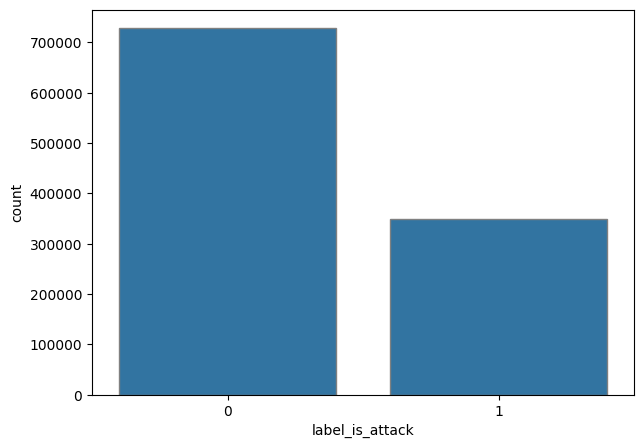

In [25]:

edgecolor = 'grey'
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='label_is_attack', data=df, order = df['label_is_attack'].value_counts().index, ax=ax, edgecolor=edgecolor)

In [26]:


df_is_attack = df.groupby('label_is_attack').agg({'label_is_attack':'first', 'label_is_attack':'count'}).rename_axis(None).sort_values('label_is_attack', ascending=False)
df_is_attack['percentage'] = df_is_attack / df_is_attack.loc[:'label_is_attack'].sum()
df_is_attack



,label_is_attack,percentage
0,728527,0.676091
1,349030,0.323909


<Axes: xlabel='count', ylabel='label'>

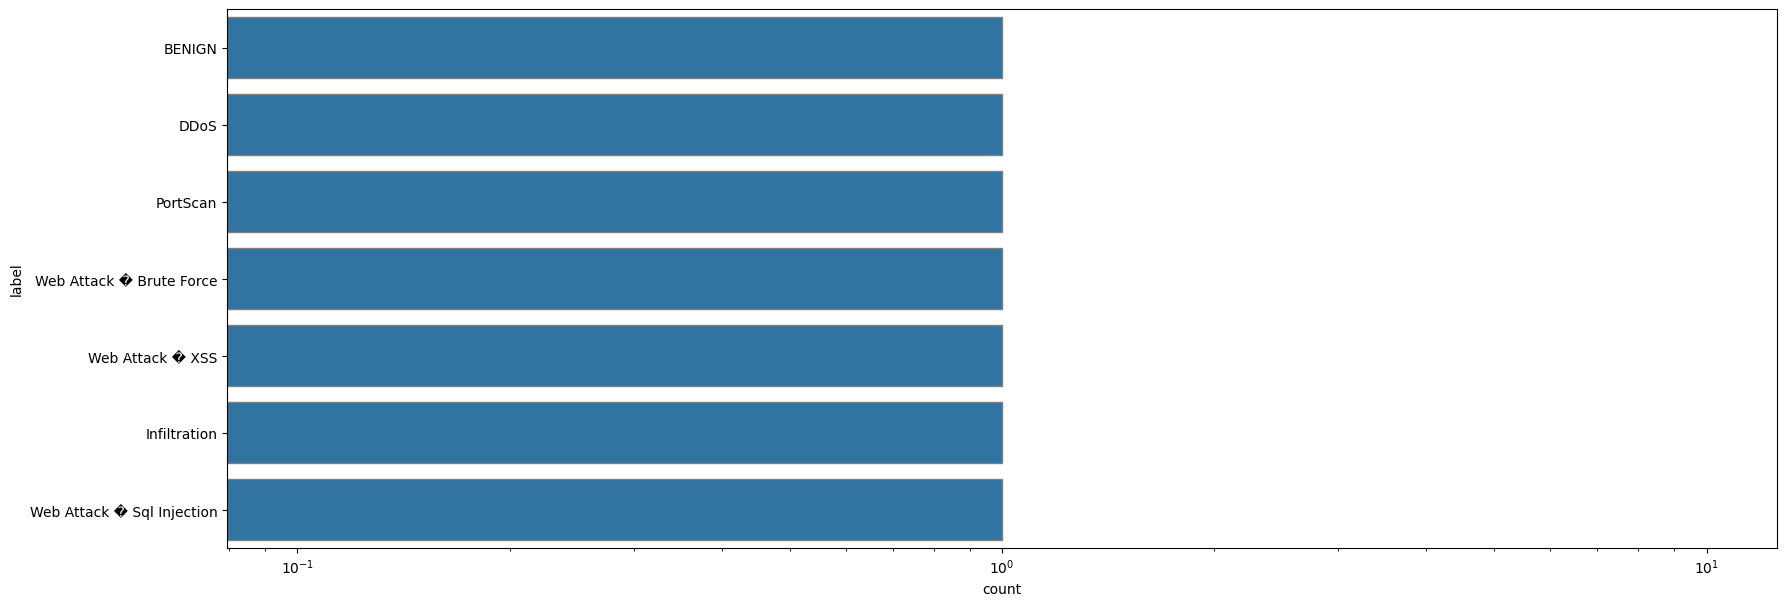

In [27]:
f, ax = plt.subplots(figsize=(20, 7))
ax.set(xscale='log')
sns.countplot(y='label', data=df, order = df['label'].value_counts().index,edgecolor=edgecolor, ax=ax)


In [28]:
df.groupby('label').agg({'label':'first', 'label':'count'}).rename_axis(None).sort_values('label', ascending=False)

,label
BENIGN,728527
DDoS,256032
PortScan,90819
Web Attack � Brute Force,1470
Web Attack � XSS,652
Infiltration,36
Web Attack � Sql Injection,21


# Feature Correlation

C:\Users\Khali\AppData\Local\Temp\ipykernel_16628\4287333475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

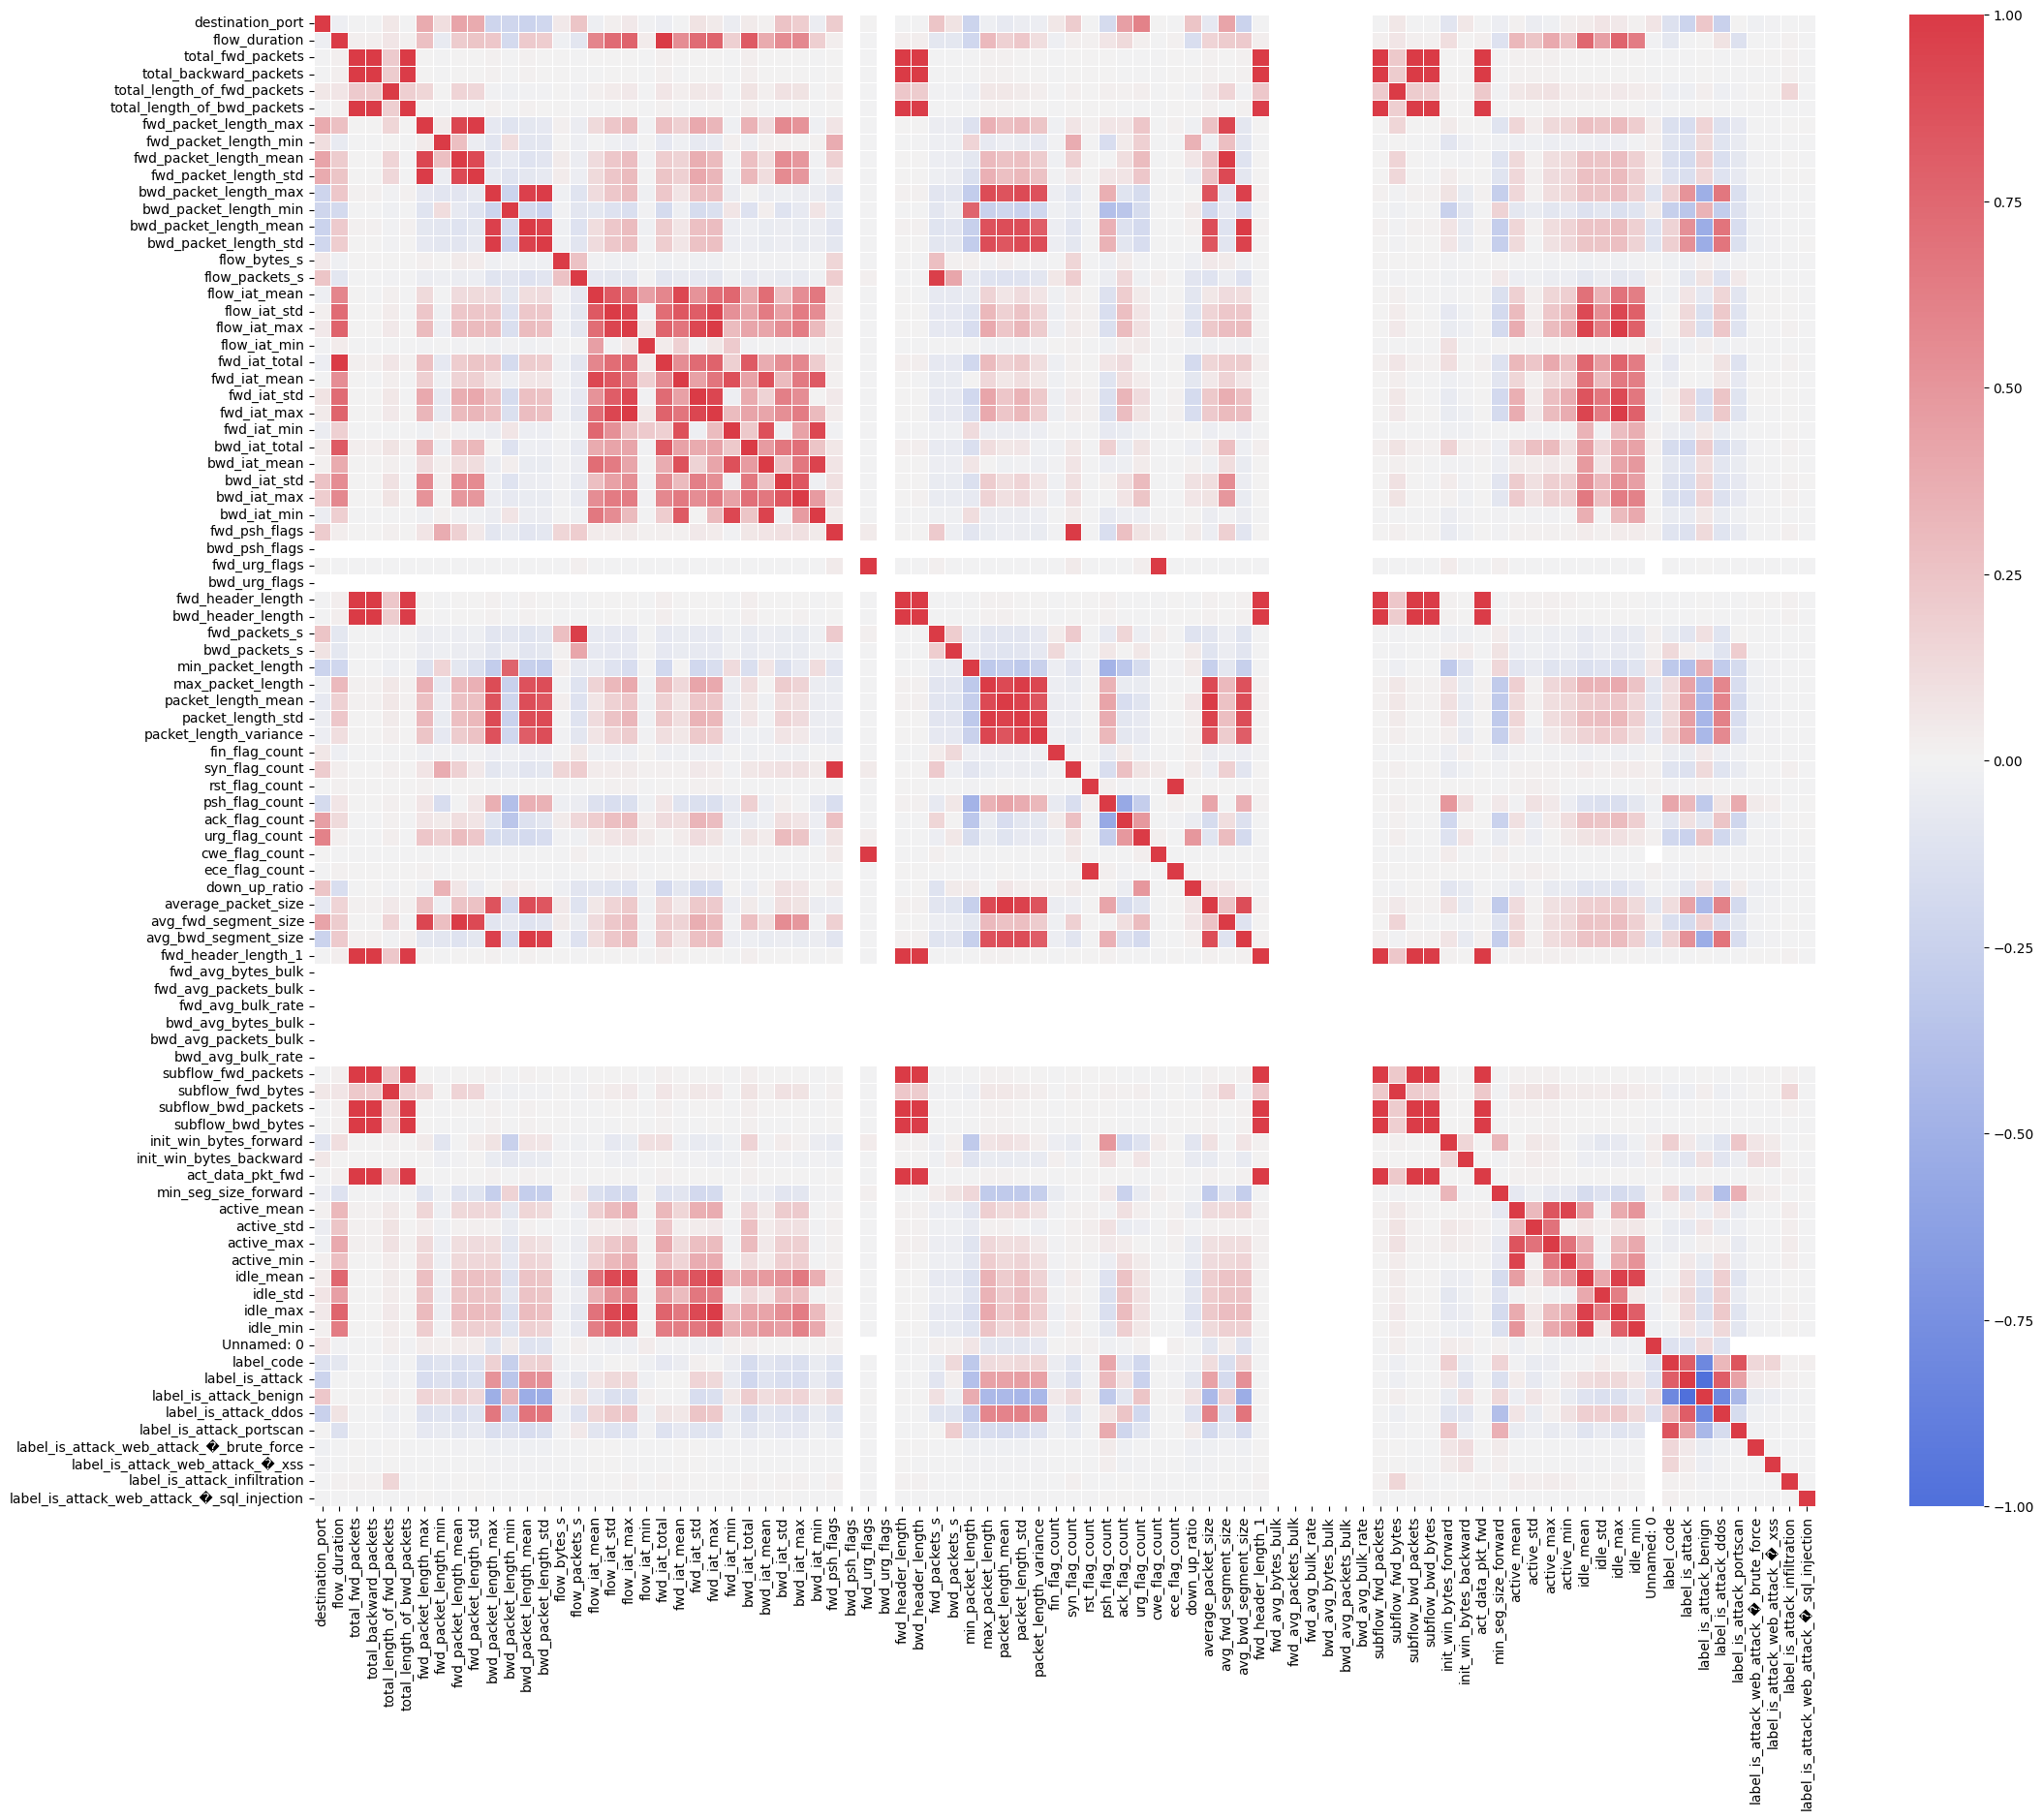

In [31]:
corr = df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True))

In [35]:
def get_abs_correlations(df, t):
    labels_to_drop = set()
    
    
    c = corr.abs().unstack().drop(labels=labels_to_drop).sort_values(ascending=False)
    return c[c > t]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_abs_correlations(df, 0.8))

avg_bwd_segment_size                        bwd_packet_length_mean                        1.000000
bwd_packet_length_mean                      avg_bwd_segment_size                          1.000000
destination_port                            destination_port                              1.000000
fwd_iat_std                                 fwd_iat_std                                   1.000000
fwd_iat_min                                 fwd_iat_min                                   1.000000
bwd_iat_total                               bwd_iat_total                                 1.000000
bwd_iat_mean                                bwd_iat_mean                                  1.000000
bwd_iat_std                                 bwd_iat_std                                   1.000000
bwd_iat_max                                 bwd_iat_max                                   1.000000
bwd_iat_min                                 bwd_iat_min                                   1.000000
fwd_psh_fl

In [36]:


corr_is_attack = corr.label_is_attack.filter(regex=r'^(?!label).*', axis=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(corr_is_attack[corr_is_attack.notnull()].sort_values(ascending=False)[:5])



bwd_packet_length_std     0.527938
bwd_packet_length_mean    0.523723
avg_bwd_segment_size      0.523723
bwd_packet_length_max     0.514933
packet_length_std         0.456990
Name: label_is_attack, dtype: float64


In [37]:
def remove_outliers(data, col, zscore_thres=3):
    return data[(np.abs(stats.zscore(data[[col]])) < zscore_thres).all(axis=1)]


def plot(fn, height, data, label, col, scale='', with_outliers=True, xlim=[], bins=10):
    fig, ax = plt.subplots(figsize=(18, height))

    d = data if with_outliers else remove_outliers(data, col)
    
    if xlim:
        ax.set_xlim(xlim)
    
    if scale:
        ax.set(xscale=scale)
    
    fn(d, label, col, ax, bins)
    plt.show()

    
def plot_box(data, label, col, scale='', with_outliers=True, xlim=[]):
    plot(lambda d, l, c, ax, b: sns.boxplot(y=l, x=c, data=d, ax=ax, orient='h', width=0.4), 2, data, label, col, scale, with_outliers, xlim)
    
    
def plot_distribution(data, label, col, scale='', with_outliers=True, xlim=[], bins=10):
    plot(lambda d, l, c, ax, b: d.groupby(l)[c].plot.hist(density=True, ax=ax, alpha=0.5, bins=b), 5, data, label, col, scale, with_outliers, xlim, bins)
    
    
def plot_stats(data, label, col, no_outliers=False):
    print(data.groupby(label)[col].describe())
    plot_box(data, label, col)
    
    
def calculate_distribution_similarity(data, label, col):
    '''
    Compare distributions by calculating the p-value for the null hypothesis that data for both categories originates from the same distribution
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
    '''
    a = data[data[label] == 0][col]
    b = data[data[label] == 1][col]
    return ks_2samp(a, b)

                    count         mean          std  min  25%  50%  \
label_is_attack                                                      
0                728527.0   113.714477   267.115738  0.0  0.0  0.0   
1                349030.0  1543.259910  1851.110916  0.0  0.0  0.0   

                         75%          max  
label_is_attack                            
0                   2.683282  3433.501973  
1                3022.508098  8194.660487  


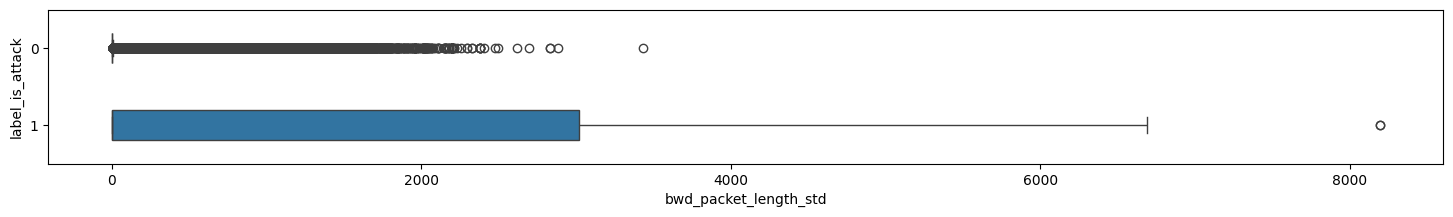

In [38]:
plot_stats(df, 'label_is_attack', 'bwd_packet_length_std')